# Merge

Often, we will want perform joint analysis on data from different sources.

For example, when analyzing the regional sales for a company, we might
want to include industry aggregates or demographic information for each
region.

Or perhaps we are working with product-level data, have a list of
product groups in a separate dataset, and want to compute aggregate
statistics for each group.

**Outcomes**

- Know the different pandas routines for combining datasets  
- Know when to use `pd.concat` vs `pd.merge` vs `pd.join`  
- Be able to apply the three main combining routines  


**Data**

- WDI data on GDP components, population, and square miles of countries  
- Book ratings: 6,000,000 ratings for the 10,000 most rated books on
  [Goodreads](https://www.goodreads.com/)  
- Details for all delayed US domestic flights in November 2016,
  obtained from the [Bureau of Transportation
  Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)  

In [2]:
import pandas as pd
import qeds

%matplotlib inline

# activate plot theme
qeds.themes.mpl_style();

from IPython.display import display

In [3]:
# from WDI. Units trillions of 2010 USD
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
wdi = pd.read_csv(url).set_index(["country", "year"])
wdi.info()

wdi2017 = wdi.xs(2017, level="year")
wdi2017

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Canada', 2017) to ('United States', 2000)
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GovExpend    72 non-null     float64
 1   Consumption  72 non-null     float64
 2   Exports      72 non-null     float64
 3   Imports      72 non-null     float64
 4   GDP          72 non-null     float64
dtypes: float64(5)
memory usage: 4.0+ KB


,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [4]:
wdi2016_17 = wdi.loc[pd.IndexSlice[:, [2016, 2017]],: ]
wdi2016_17

GovExpend  Consumption   Exports   Imports        GDP
country        year                                                       
Canada         2017   0.372665     1.095475  0.582831  0.600031   1.868164
               2016   0.364899     1.058426  0.576394  0.575775   1.814016
Germany        2017   0.745579     2.112009  1.930563  1.666348   3.883870
               2016   0.734014     2.075615  1.844949  1.589495   3.801859
United Kingdom 2017   0.549538     1.809154  0.862629  0.933145   2.818704
               2016   0.550596     1.772348  0.816792  0.901494   2.768241
United States  2017   2.405743    12.019266  2.287071  3.069954  17.348627
               2016   2.407981    11.722133  2.219937  2.936004  16.972348

In [5]:
# Data from https://www.nationmaster.com/country-info/stats/Geography/Land-area/Square-miles
# units -- millions of square miles
sq_miles = pd.Series({
   "United States": 3.8,
   "Canada": 3.8,
   "Germany": 0.137,
   "United Kingdom": 0.0936,
   "Russia": 6.6,
}, name="sq_miles").to_frame()
sq_miles.index.name = "country"
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [6]:
# from WDI. Units millions of people
pop_url = "https://datascience.quantecon.org/assets/data/wdi_population.csv"
pop = pd.read_csv(pop_url).set_index(["country", "year"])
pop.info()
pop.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Canada', 2017) to ('United States', 2000)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  72 non-null     float64
dtypes: float64(1)
memory usage: 1.8+ KB


Population
country year            
Canada  2017   36.540268
        2016   36.109487
        2015   35.702908
        2014   35.437435
        2013   35.082954
        2012   34.714222
        2011   34.339328
        2010   34.004889
        2009   33.628895
        2008   33.247118

Suppose that we were asked to compute a number of statistics with the data above:

- As a measure of land usage or productivity, what is Consumption per square mile?  
- What is GDP per capita (per person) for each country in each year? How about
  Consumption per person?  
- What is the population density of each country? How much does it change over time?  


Notice that to answer any of the questions from above, we will have to use data
from more than one of our DataFrames.

In this lecture, we will learn many techniques for combining datasets that
originate from different sources, careful to ensure that data is properly
aligned.

In pandas three main methods can combine datasets:

1. `pd.concat([dfs...])`  
1. `pd.merge(df1, df2)`  
1. `df1.join(df2)`  


We’ll look at each one.

## `pd.concat`

The `pd.concat` function is used to stack two or more DataFrames
together.

An example of when you might want to do this is if you have monthly data
in separate files on your computer and would like to have 1 year of data
in a single DataFrame.

The first argument to `pd.concat` is a list of DataFrames to be
stitched together.

The other commonly used argument is named `axis`.

As we have seen before, many pandas functions have an `axis` argument
that specifies whether a particular operation should happen down rows
(`axis=0`) or along columns (`axis=1`).

In the context of `pd.concat`, setting `axis=0` (the default case)
will stack DataFrames on top of one another while `axis=1` stacks them
side by side.

We’ll look at each case separately.

### `axis=0`

When we call `pd.concat` and set `axis=0`, the list of DataFrames
passed in the first argument will be stacked on top of one another.

Let’s try it out here.

In [7]:
wdi2017

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [8]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [9]:
# equivalent to pd.concat([wdi2017, sq_miles]) -- axis=0 is default
pd.concat([wdi2017, sq_miles], axis=0)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,NaN
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,NaN
United States,2.405743,12.019266,2.287071,3.069954,17.348627,NaN
United States,NaN,NaN,NaN,NaN,NaN,3.8000
Canada,NaN,NaN,NaN,NaN,NaN,3.8000
Germany,NaN,NaN,NaN,NaN,NaN,0.1370
United Kingdom,NaN,NaN,NaN,NaN,NaN,0.0936
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


Notice a few things:

- 
  <dl style='margin: 20px 0;'>
  <dt>The number of rows in the output is the total number</dt>
  <dd>
  of rows in all inputs. The labels are all from the original
  DataFrames.  
  </dd>
  
  </dl>
  
- The column labels are all the distinct column labels from all the inputs.  
- For columns that appeared only in one input, the value for all row labels
  originating from a different input is equal to `NaN` (marked as missing).  

### `axis=1`

In this example, concatenating by stacking
side-by-side makes more sense.

We accomplish this by passing `axis=1` to `pd.concat`:

In [11]:
wdi2017

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [12]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [10]:
pd.concat([wdi2017, sq_miles], axis=1)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


Notice here that

- The index entries are all unique index entries that appeared in any DataFrame.  
- The column labels are all column labels from the inputs.  
- As `wdi2017` didn’t have a `Russia` row, the value for all of its columns
  is `NaN`.  


Now we can answer one of our questions from above: What is
Consumption per square mile?

In [13]:
temp = pd.concat([wdi2017, sq_miles], axis=1)
temp["Consumption"] / temp["sq_miles"]

Canada             0.288283
Germany           15.416124
United Kingdom    19.328569
United States      3.162965
Russia                  NaN
dtype: float64

## `pd.merge`

`pd.merge` operates on two DataFrames at a time and is primarily used
to bring columns from one DataFrame into another, *aligning* data based
on one or more “key” columns.

This is a somewhat difficult concept to grasp by reading, so let’s look at some
examples.

In [15]:
pd.concat([wdi2017, sq_miles], axis=1)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [97]:
foo = pd.merge(wdi2017, sq_miles, on="country")

In [99]:
wdi2017

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [100]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [98]:
foo

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


The output here looks very similar to what we saw with `concat` and
`axis=1`, except that the row for `Russia` does not appear.

We will talk more about why this happened soon.

For now, let’s look at a slightly more intriguing example:

In [17]:
wdi2016_17

GovExpend  Consumption   Exports   Imports        GDP
country        year                                                       
Canada         2017   0.372665     1.095475  0.582831  0.600031   1.868164
               2016   0.364899     1.058426  0.576394  0.575775   1.814016
Germany        2017   0.745579     2.112009  1.930563  1.666348   3.883870
               2016   0.734014     2.075615  1.844949  1.589495   3.801859
United Kingdom 2017   0.549538     1.809154  0.862629  0.933145   2.818704
               2016   0.550596     1.772348  0.816792  0.901494   2.768241
United States  2017   2.405743    12.019266  2.287071  3.069954  17.348627
               2016   2.407981    11.722133  2.219937  2.936004  16.972348

In [18]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [16]:
pd.merge(wdi2016_17, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Canada,0.364899,1.058426,0.576394,0.575775,1.814016,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
Germany,0.734014,2.075615,1.844949,1.589495,3.801859,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United Kingdom,0.550596,1.772348,0.816792,0.901494,2.768241,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
United States,2.407981,11.722133,2.219937,2.936004,16.972348,3.8000


Here’s how we think about what happened:

- The data in `wdi2016_17` is copied over exactly as is.  
- Because `country` was on the index for both DataFrames, it is on the
  index of the output.  
- We lost the year on the index – we’ll work on getting it back below.  
- The additional column in `sq_miles` was added to column labels for the
  output.  
- The data from the `sq_miles` column was added to the output by looking up
  rows where the `country` in the two DataFrames lined up.
  -  Note that all the countries appeared twice, and the data in `sq_miles` was repeated. This is because `wdi2016_17` had two rows for each country.
  -  Also note that because `Russia` did not appear in `wdi2016_17`, the value `sq_miles.loc["Russia"]` (i.e. `6.6`) is not used the output.  

How do we get the year back?

We must first call `reset_index` on `wdi2016_17` so
that in the first step when all columns are copied over, `year` is included.

In [21]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [19]:
wdi2016_17.reset_index()

,country,year,GovExpend,Consumption,Exports,Imports,GDP
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016
2,Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870
3,Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859
4,United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704
5,United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241
6,United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627
7,United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348


In [20]:
pd.merge(wdi2016_17.reset_index(), sq_miles, on="country")

,country,year,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,3.8000
2,Germany,2017,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
3,Germany,2016,0.734014,2.075615,1.844949,1.589495,3.801859,0.1370
4,United Kingdom,2017,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
5,United Kingdom,2016,0.550596,1.772348,0.816792,0.901494,2.768241,0.0936
6,United States,2017,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
7,United States,2016,2.407981,11.722133,2.219937,2.936004,16.972348,3.8000


### Multiple Columns

Sometimes, we need to merge multiple columns.

For example our `pop` and `wdi2016_17` DataFrames both have observations
organized by country and year.

To properly merge these datasets, we would need to align the data by
both country and year.

We pass a list to the `on` argument to accomplish this:

In [22]:
wdi2016_17

GovExpend  Consumption   Exports   Imports        GDP
country        year                                                       
Canada         2017   0.372665     1.095475  0.582831  0.600031   1.868164
               2016   0.364899     1.058426  0.576394  0.575775   1.814016
Germany        2017   0.745579     2.112009  1.930563  1.666348   3.883870
               2016   0.734014     2.075615  1.844949  1.589495   3.801859
United Kingdom 2017   0.549538     1.809154  0.862629  0.933145   2.818704
               2016   0.550596     1.772348  0.816792  0.901494   2.768241
United States  2017   2.405743    12.019266  2.287071  3.069954  17.348627
               2016   2.407981    11.722133  2.219937  2.936004  16.972348

In [23]:
pop

Population
country       year            
Canada        2017   36.540268
              2016   36.109487
              2015   35.702908
              2014   35.437435
              2013   35.082954
...                        ...
United States 2004  292.805298
              2003  290.107933
              2002  287.625193
              2001  284.968955
              2000  282.162411

[72 rows x 1 columns]

In [24]:
pd.merge(wdi2016_17, pop, on=["country", "year"])

GovExpend  Consumption   Exports   Imports        GDP  \
country        year                                                          
Canada         2017   0.372665     1.095475  0.582831  0.600031   1.868164   
               2016   0.364899     1.058426  0.576394  0.575775   1.814016   
Germany        2017   0.745579     2.112009  1.930563  1.666348   3.883870   
               2016   0.734014     2.075615  1.844949  1.589495   3.801859   
United Kingdom 2017   0.549538     1.809154  0.862629  0.933145   2.818704   
               2016   0.550596     1.772348  0.816792  0.901494   2.768241   
United States  2017   2.405743    12.019266  2.287071  3.069954  17.348627   
               2016   2.407981    11.722133  2.219937  2.936004  16.972348   

                     Population  
country        year              
Canada         2017   36.540268  
               2016   36.109487  
Germany        2017   82.657002  
               2016   82.348669  
United Kingdom 2017   66.058859  
               2016   65.595565  
United States  2017  325.147121  
               2016  323.071342

Now, we can answer more of our questions from above: What is GDP per capita (per
person) for each country in each year? How about Consumption per person?

In [25]:
wdi_pop = pd.merge(wdi2016_17, pop, on=["country", "year"])
wdi_pop["GDP"] / wdi_pop["Population"]

country         year
Canada          2017    0.051126
                2016    0.050237
Germany         2017    0.046988
                2016    0.046168
United Kingdom  2017    0.042670
                2016    0.042202
United States   2017    0.053356
                2016    0.052534
dtype: float64

In [26]:
wdi_pop["Consumption"] / wdi_pop["Population"]

country         year
Canada          2017    0.029980
                2016    0.029312
Germany         2017    0.025551
                2016    0.025205
United Kingdom  2017    0.027387
                2016    0.027019
United States   2017    0.036966
                2016    0.036283
dtype: float64

**Exercise 1**

Use your new `merge` skills to answer the final question from above: What
is the population density of each country? How much does it change over
time?

<AxesSubplot:xlabel='year'>

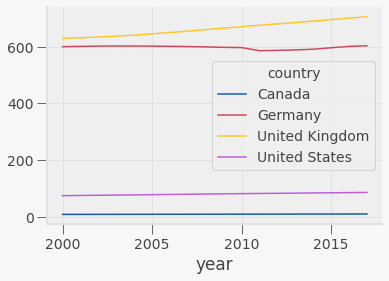

In [31]:
foo = pd.merge(pop.reset_index(), sq_miles, on="country")

foo["pop_density"] = foo["Population"] / foo["sq_miles"]
# foo["pop_density"] = foo.eval("Population / sq_miles")

foo.pivot_table(index="year", columns="country", values="pop_density").plot(kind="line")
# foo.pivot_table(index="year", columns="country", values="pop_density").plot(kind="line")

In [28]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [27]:
pop

Population
country       year            
Canada        2017   36.540268
              2016   36.109487
              2015   35.702908
              2014   35.437435
              2013   35.082954
...                        ...
United States 2004  292.805298
              2003  290.107933
              2002  287.625193
              2001  284.968955
              2000  282.162411

[72 rows x 1 columns]

## Arguments to `merge`

The `pd.merge` function can take many optional arguments.

We’ll talk about a few of the most commonly-used ones here and refer you
to the
[documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge.html#pandas.merge)
for more details.

We’ll follow the pandas convention and refer to the first argument to
`pd.merge` as `left` and call the second `right`.

### `on`

We have already seen this one used before, but we want to point out that on
is optional.

If nothing is given for this argument, pandas will use **all** columns
in `left` and `right` with the same name.

In our example, `country` is the only column that appears in both
DataFrames, so it is used for `on` if we don’t pass anything.

The following two are equivalent.

In [32]:
pd.merge(wdi2017, sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [33]:
# if we move index back to columns, the `on` is un-necessary
pd.merge(wdi2017.reset_index(), sq_miles.reset_index())

,country,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
0,Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
1,Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
2,United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
3,United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


### `left_on`, `right_on`

Above, we used the `on` argument to identify a column in both `left`
and `right` that was used to align data.

Sometimes, both DataFrames don’t have the same name for this column.

In that case, we use the `left_on` and `right_on` arguments, passing
the proper column name(s) to align the data.

We’ll show you an example below, but it is somewhat silly as our
DataFrames do both have the `country` column.

In [34]:
pd.merge(wdi2017, sq_miles, left_on="country", right_on="country")
# pd.merge(wdi2017, sq_miles, left_on=["country", "year"], right_on=["country", "dt"])

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


### `left_index`, `right_index`

Sometimes, as in our example, the key used to align data is actually in the
index instead of one of the columns.

In this case, we can use the `left_index` or `right_index` arguments.

We should only set these values to a boolean (`True` or `False`).

Let’s practice with this.

In [38]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [44]:
pd.merge(wdi2017.reset_index(), sq_miles, left_on="country", right_index=True)  # More important

,country,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
0,Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
1,Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
2,United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
3,United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


Fun trying to break it

In [40]:
sq_miles2 = sq_miles.copy()
sq_miles2.index.name = "test"

In [41]:
sq_miles2

,sq_miles
test,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [43]:
pd.merge(wdi2017, sq_miles2, left_on="country", right_index=True)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [37]:
wdi2017.reset_index()

,country,GovExpend,Consumption,Exports,Imports,GDP
0,Canada,0.372665,1.095475,0.582831,0.600031,1.868164
1,Germany,0.745579,2.112009,1.930563,1.666348,3.883870
2,United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
3,United States,2.405743,12.019266,2.287071,3.069954,17.348627


### `how`

The `how` is perhaps the most powerful, but most conceptually
difficult of the arguments we will cover.

This argument controls which values from the key column(s) appear in the
output.

The 4 possible options for this argument are summarized in
the image below.

<img src="https://datascience.quantecon.org/assets/_static/merge_files/merge_venns.png" alt="merge\_venns.png" style="">

  
In words, we have:

- `left`: Default and what we described above. It uses
  the keys from the `left` DataFrame.  
- `right`: Output will contain all keys from `right`.  
- `inner`: The output will only contain keys that appear in *both*
  `left` and `right`.  
- `outer`: The output will contain any key found in either `left`
  or `right`.  


In addition to the above, we will use the following two DataFrames to
illustrate the `how` option.

In [45]:
wdi2017_no_US = wdi2017.drop("United States")
wdi2017_no_US

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704


In [46]:
sq_miles_no_germany = sq_miles.drop("Germany")
sq_miles_no_germany

,sq_miles
country,
United States,3.8000
Canada,3.8000
United Kingdom,0.0936
Russia,6.6000


Now, let’s see all the possible `how` options.

In [48]:
wdi2017

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704
United States,2.405743,12.019266,2.287071,3.069954,17.348627


In [49]:
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [47]:
# default
pd.merge(wdi2017, sq_miles, on="country", how="left")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [50]:
pd.merge(wdi2017, sq_miles_no_germany, on="country", how="left")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [51]:
# notice ``Russia`` is included
pd.merge(wdi2017, sq_miles, on="country", how="right")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [53]:
wdi2017_no_US

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704


In [54]:
sq_miles


,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [52]:
# notice no United States or Russia
pd.merge(wdi2017_no_US, sq_miles, on="country", how="inner")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936


In [55]:
# includes all 5, even though they don't all appear in either DataFrame
pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="outer")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,NaN,NaN,NaN,NaN,NaN,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


**Exercise 3**

Can you pick the correct argument for `how` such that `pd.merge(wdi2017, sq_miles,
how="left")` is equal to `pd.merge(sq_miles, wdi2017, how=XXX)`?

In [60]:
pd.merge?

In [61]:
pd.merge(wdi2017, sq_miles, how="left", on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [62]:
pd.merge(sq_miles, wdi2017, how="right", on="country")

,sq_miles,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,,
Canada,3.8000,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.1370,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.0936,0.549538,1.809154,0.862629,0.933145,2.818704
United States,3.8000,2.405743,12.019266,2.287071,3.069954,17.348627


### `df.merge(df2)`

Note that the DataFrame type has a `merge` *method*.

It is the same as the function we have been working with, but passes the
DataFrame before the period as `left`.

Thus `df.merge(other)` is equivalent to `pd.merge(df, other)`.

In [63]:
wdi2017.merge(sq_miles, on="country", how="right")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


## `df.join`

The `join` method for a DataFrame is very similar to the `merge`
method described above, but only allows you to use the index of the
`right` DataFrame as the join key.

Thus, `left.join(right, on="country")` is equivalent to calling
`pd.merge(left, right, left_on="country", right_index=True)`.

The implementation of the `join` method calls `merge` internally,
but sets the `left_on` and `right_index` arguments for you.

You can do anything with `df.join` that you can do with
`df.merge`, but `df.join` is more convenient to use if the keys of `right`
are in the index.

In [64]:
wdi2017.join(sq_miles, on="country")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [65]:
wdi2017.merge(sq_miles, left_on="country", right_index=True)

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


## Case Study

Let’s put these tools to practice by loading some real datasets and
seeing how these functions can be applied.

We’ll analyze ratings of books from the website [Goodreads](https://www.goodreads.com/).

We accessed the data [here](https://github.com/zygmuntz/goodbooks-10k).

Let’s load it up.

In [66]:
ratings = qeds.data.load("goodreads_ratings")
display(ratings.head())
ratings.info()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


We can already do some interesting things with just the ratings data.

Let’s see how many ratings of each number are in our dataset.

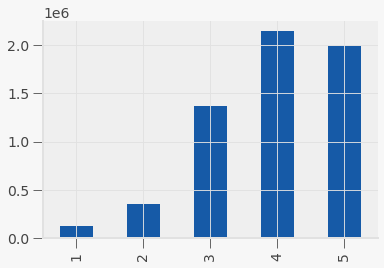

In [67]:
ratings["rating"].value_counts().sort_index().plot(kind="bar");

Let’s also see how many users have rated `N` books, for all `N`
possible.

To do this, we will use `value_counts` twice (can you think of why?).

We will see a more flexible way of performing similar grouped operations in
a future lecture.

In [71]:
ratings["user_id"].unique()

array([    1,     2,     4, ..., 27329, 33111, 49802])

In [69]:
ratings["user_id"].value_counts()

30944    200
12874    200
52036    199
28158    199
12381    199
        ... 
51725     21
32128     21
40753     21
43675     20
34590     19
Name: user_id, Length: 53424, dtype: int64

In [68]:
users_by_n = (
    ratings["user_id"]
    .value_counts()  # Series. Index: user_id, value: n ratings by user
    .value_counts()  # Series. Index: n_ratings by user, value: N_users with this many ratings
    .sort_index()    # Sort our Series by the index (number of ratings)
    .reset_index()   # Dataframe with columns `index` (from above) and `user_id`
    .rename(columns={"index": "N_ratings", "user_id": "N_users"})
)
users_by_n.head(10)

,N_ratings,N_users
0,19,1
1,20,1
2,21,3
3,22,13
4,23,5
5,24,11
6,25,13
7,26,23
8,27,34
9,28,26


In [72]:
users_by_n.tail(10)

,N_ratings,N_users
171,190,24
172,191,8
173,192,7
174,193,15
175,194,5
176,195,5
177,196,8
178,197,2
179,199,3
180,200,2


Let’s look at some statistics on that dataset.

In [75]:
users_by_n.loc[users_by_n["N_users"] > 900, :]

,N_ratings,N_users
84,103,927
85,104,916
87,106,950
88,107,961
89,108,956
90,109,959
91,110,964
92,111,911
93,112,926
94,113,926


In [73]:
users_by_n.describe()

,N_ratings,N_users
count,181.00000,181.000000
mean,109.01105,295.160221
std,52.41342,309.461848
min,19.00000,1.000000
25%,64.00000,40.000000
50%,109.00000,158.000000
75%,154.00000,538.000000
max,200.00000,964.000000


We can see the same data visually in a box plot.

N_ratings       AxesSubplot(0.125,0.125;0.352273x0.755)
N_users      AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

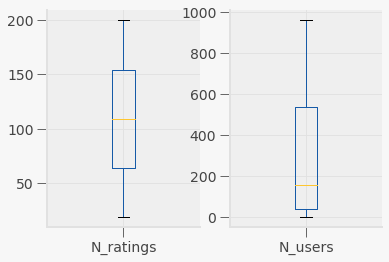

In [76]:
users_by_n.plot(kind="box", subplots=True)

Let’s practice applying the want operator…

**Want**: Determine whether a relationship between the number of
ratings a user has written and the distribution of the ratings exists. (Maybe we
are an author hoping to inflate our ratings and wonder if we should
target “more experienced” Goodreads users, or focus on newcomers.)

Let’s start from the result and work our way backwards:

1. We can answer our question if we have two similar DataFrames:  
  - All ratings by the `N` (e.g. 5) users with the most ratings  
  - All ratings by the `N` users with the least number of
    ratings  
1. To get that, we will need to extract rows of `ratings` with
  `user_id` associated with the `N` most and least prolific raters  
1. For that, we need the most and least active `user_id`s  
1. To get that info, we need a count of how many ratings each user left.  
  - We can get that with `df["user_id"].value_counts()`, so let’s
    start there.  

In [77]:
# step 4
n_ratings = ratings["user_id"].value_counts()
n_ratings.head()

30944    200
12874    200
52036    199
28158    199
12381    199
Name: user_id, dtype: int64

In [78]:
# step 3
N = 5
most_prolific_users = n_ratings.nlargest(5).index.tolist()
least_prolific_users = n_ratings.nsmallest(5).index.tolist()

In [79]:
most_prolific_users

[30944, 12874, 52036, 28158, 12381]

In [80]:
least_prolific_users

[34590, 43675, 51725, 32128, 40753]

In [81]:
# step 2
active_ratings = ratings.loc[ratings["user_id"].isin(most_prolific_users), :]
inactive_ratings = ratings.loc[ratings["user_id"].isin(least_prolific_users), :]

<AxesSubplot:title={'center':'Distribution of ratings by most active users'}>

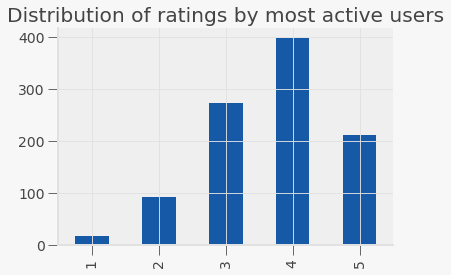

In [82]:
# step 1 -- get the answer!
active_ratings["rating"].value_counts().sort_index().plot(
    kind="bar", title="Distribution of ratings by most active users"
)

<AxesSubplot:title={'center':'Distribution of ratings by least active users'}>

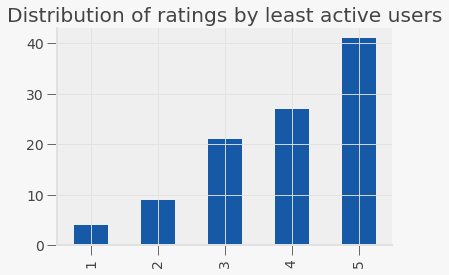

In [83]:
inactive_ratings["rating"].value_counts().sort_index().plot(
    kind="bar", title="Distribution of ratings by least active users"
)

Nice! From the picture above, the new users look much more
likely to leave 5 star ratings than more experienced users.

### Book Data

We know what you are probably thinking: “Isn’t this a lecture on merging?
Why are we only using one dataset?”

We hear you.

Let’s also load a dataset containing information on the actual books.

In [84]:
books = qeds.data.load("goodreads_books")

# we only need a few of the columns
books = books[["book_id", "authors", "title"]]
print("shape: ", books.shape)
print("dtypes:\n", books.dtypes, sep="")
books.head()

shape:  (10000, 3)
dtypes:
book_id     int64
authors    object
title      object
dtype: object


,book_id,authors,title
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)"
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
2,3,Stephenie Meyer,"Twilight (Twilight, #1)"
3,4,Harper Lee,To Kill a Mockingbird
4,5,F. Scott Fitzgerald,The Great Gatsby


We could do similar interesting things with just the books dataset,
but we will skip it for now and merge them together.

In [87]:
rated_books = pd.merge(ratings, books, left_on="book_id", right_on="book_id")

Now, let’s see which books have been most often rated.

In [88]:
rated_books

,user_id,book_id,rating,authors,title
0,1,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...
1,11,258,3,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...
2,143,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...
3,242,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...
4,325,258,4,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...
...,...,...,...,...,...
5976474,36773,9548,5,L.J. Shen,"Vicious (Sinners of Saint, #1)"
5976475,50673,9548,4,L.J. Shen,"Vicious (Sinners of Saint, #1)"
5976476,45213,9548,3,L.J. Shen,"Vicious (Sinners of Saint, #1)"
5976477,12872,9548,4,L.J. Shen,"Vicious (Sinners of Saint, #1)"


In [89]:
most_rated_books_id = rated_books["book_id"].value_counts().nlargest(10).index
most_rated_books = rated_books.loc[rated_books["book_id"].isin(most_rated_books_id), :]
list(most_rated_books["title"].unique())

['Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
 'The Great Gatsby',
 'To Kill a Mockingbird',
 'The Hobbit',
 'Twilight (Twilight, #1)',
 'The Hunger Games (The Hunger Games, #1)',
 'Catching Fire (The Hunger Games, #2)',
 'Mockingjay (The Hunger Games, #3)']

Let’s use our `pivot_table` knowledge to compute the average rating
for each of these books.

In [90]:
most_rated_books.pivot_table(values="rating", index="title")

,rating
title,
"Catching Fire (The Hunger Games, #2)",4.133422
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4.229418
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.418732
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.351350
"Mockingjay (The Hunger Games, #3)",3.853131
The Great Gatsby,3.772224
The Hobbit,4.148477
"The Hunger Games (The Hunger Games, #1)",4.279707
To Kill a Mockingbird,4.329369


These ratings seem surprisingly low, given that they are the most often
rated books on Goodreads.

I wonder what the bottom of the distribution looks like...

**Exercise 4**

Repeat the analysis above to determine the average rating for the books with the
*least* number ratings.

Is there a distinguishable difference in the average rating compared to
the most rated books?

Did you recognize any of the books?

Let’s compute the average number of ratings for each book in our sample.

In [94]:
average_ratings = (
    rated_books
    .pivot_table(values="rating", index="title", aggfunc=len)
    .sort_values(by="rating", ascending=False)
)
average_ratings.head(10)

,rating
title,
"The Hunger Games (The Hunger Games, #1)",22806
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",21850
To Kill a Mockingbird,19088
"Twilight (Twilight, #1)",16931
The Great Gatsby,16604
"Catching Fire (The Hunger Games, #2)",16549
"Mockingjay (The Hunger Games, #3)",15953
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",15855
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",15657


In [95]:
average_ratings = (
    rated_books
    .pivot_table(values="rating", index="title")
    .sort_values(by="rating", ascending=False)
)
average_ratings.head(10)

,rating
title,
The Complete Calvin and Hobbes,4.829876
ESV Study Bible,4.818182
Attack of the Deranged Mutant Killer Monster Snow Goons,4.768707
The Indispensable Calvin and Hobbes,4.766355
The Revenge of the Baby-Sat,4.761364
There's Treasure Everywhere: A Calvin and Hobbes Collection,4.760456
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,4.757202
It's a Magical World: A Calvin and Hobbes Collection,4.747396
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",4.736842


What does the overall distribution of average ratings look like?

<AxesSubplot:ylabel='Frequency'>

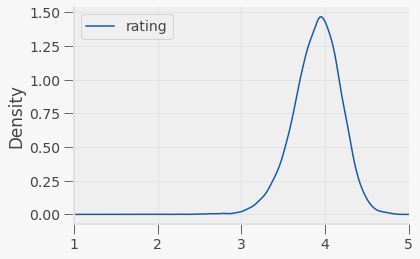

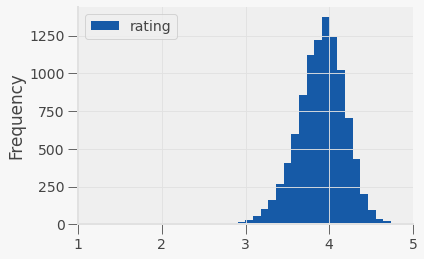

In [96]:
# plot a kernel density estimate of average ratings
average_ratings.plot.density(xlim=(1, 5))

# or a histogram
average_ratings.plot.hist(bins=30, xlim=(1, 5))

It looks like most books have an average rating of just below 4.

## Visualizing Merge Operations

As we did in the [reshape lecture](reshape.ipynb), we will visualize the
various merge operations using artificial DataFrames.

First, we create some dummy DataFrames.

In [ ]:
dfL = pd.DataFrame(
    {"Key": ["A", "B", "A", "C"], "C1":[1, 2, 3, 4], "C2": [10, 20, 30, 40]},
    index=["L1", "L2", "L3", "L4"]
)[["Key", "C1", "C2"]]

print("This is dfL: ")
display(dfL)

dfR = pd.DataFrame(
    {"Key": ["A", "B", "C", "D"], "C3": [100, 200, 300, 400]},
    index=["R1", "R2", "R3", "R4"]
)[["Key", "C3"]]

print("This is dfR:")
display(dfR)

### `pd.concat`

Recall that calling `pd.concat(..., axis=0)` will stack DataFrames on top of
one another:

In [ ]:
pd.concat([dfL, dfR], axis=0)

Here’s how we might visualize that.

<img src="https://datascience.quantecon.org/assets/_static/merge_files/concat_axis0.gif" alt="concat\_axis0.gif" style="">

  
We can also set `axis=1` to stack side by side.

In [ ]:
pd.concat([dfL, dfR], axis=1)

Here’s how we might visualize that.

<img src="https://datascience.quantecon.org/assets/_static/merge_files/concat_axis1.gif" alt="concat\_axis1.gif" style="">

### `pd.merge`

The animation below shows a visualization of what happens when we call

In [ ]:
pd.merge(dfL, dfR, on="Key")

<img src="https://datascience.quantecon.org/assets/_static/merge_files/left_merge.gif" alt="left\_merge.gif" style="">

  
Now, let’s focus on what happens when we set `how="right"`.

Pay special attention to what happens when filling the output value for
the key `A`.

In [ ]:
pd.merge(dfL, dfR, on="Key", how="right")

<img src="https://datascience.quantecon.org/assets/_static/merge_files/right_merge.gif" alt="right\_merge.gif" style="">